## Normalisation

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize 
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load the datasets back from CSV files

period_names = ['1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
loaded_datasets = {}

for period_name in period_names:
    loaded_datasets[period_name] = pd.read_csv(f"datasets/climate_features_{period_name}.csv")
    print(f"Loaded climate_features_{period_name}.csv with shape {loaded_datasets[period_name].shape}")
    # print the size in ko of the loaded dataset

Loaded climate_features_1970-1979.csv with shape (58, 50)
Loaded climate_features_1980-1989.csv with shape (58, 50)
Loaded climate_features_1990-1999.csv with shape (58, 50)
Loaded climate_features_2000-2009.csv with shape (58, 50)
Loaded climate_features_2010-2020.csv with shape (58, 50)


In [17]:
ds_70 = loaded_datasets['1970-1979']
ds_70 = ds_70.drop(columns=['latitude', 'longitude'])
ds_70_norm =  normalize(ds_70, axis=0)
ds_70_norm_df = pd.DataFrame(ds_70_norm, columns=ds_70.columns)
display(ds_70_norm_df.head())

,sf_jan,sf_feb,sf_mar,sf_apr,sf_may,sf_jun,sf_jul,sf_aug,sf_sep,sf_oct,...,si10_mar,si10_apr,si10_may,si10_jun,si10_jul,si10_aug,si10_sep,si10_oct,si10_nov,si10_dec
0,0.000345,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.080268,0.090762,0.089452,0.102038,0.105701,0.100479,0.081645,0.069178,0.064219,0.069036
1,0.000345,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.080268,0.090762,0.089452,0.102038,0.105701,0.100479,0.081645,0.069178,0.064219,0.069036
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.221858,0.234842,0.197332,0.184917,0.174327,0.167534,0.169064,0.190585,0.194545,0.197140
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.169642,0.168800,0.184535,0.181509,0.173730,0.173283,0.164319,0.167070,0.147648,0.151901
4,0.007764,0.001574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008547,...,0.088853,0.085980,0.084465,0.092804,0.101986,0.110660,0.093700,0.095314,0.079944,0.079848


In [60]:
ds_2010 = loaded_datasets['2010-2020']
ds_2010 = ds_2010.drop(columns=['latitude', 'longitude'])
display(ds_2010.head())

,sf_jan,sf_feb,sf_mar,sf_apr,sf_may,sf_jun,sf_jul,sf_aug,sf_sep,sf_oct,...,si10_mar,si10_apr,si10_may,si10_jun,si10_jul,si10_aug,si10_sep,si10_oct,si10_nov,si10_dec
0,2.600930e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.709264,2.473005,2.561411,2.765751,2.649393,2.595085,2.506092,2.221290,2.155349,2.236704
1,2.600930e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.709264,2.473005,2.561411,2.765751,2.649393,2.595085,2.506092,2.221290,2.155349,2.236704
2,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.969207,6.171736,5.876575,4.587439,4.081589,3.757772,4.894031,5.559114,6.458305,7.284534
3,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.616867,5.310319,4.946976,4.837750,4.600343,4.607470,4.528797,4.373834,4.895583,5.064164
4,2.176111e-05,8.669767e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.866624,2.733792,2.545431,2.571770,2.845815,3.237419,2.744484,2.707152,2.784056,2.828146


## Variance des features

In [47]:
# Calculate variance for each feature

variances = pd.DataFrame()

for col in ds_70_norm_df.columns:
    var = statistics.variance(ds_70_norm_df[col])
    variances = pd.concat([variances, pd.DataFrame({'Feature': [col], 'Variance': [var]})], ignore_index=True)

variance_sort = variances.sort_values(by='Variance', ascending=False)
display(variance_sort)


,Feature,Variance
5,sf_jun,0.016973
6,sf_jul,0.016764
4,sf_may,0.016491
3,sf_apr,0.016158
7,sf_aug,0.016119
8,sf_sep,0.013709
2,sf_mar,0.013191
9,sf_oct,0.010492
1,sf_feb,0.008664
0,sf_jan,0.008236


## Matrice de corrélation

In [ ]:
df = pd.DataFrame(ds_70)
corr_matrix = df.corr()
display(corr_matrix)

,sf_jan,sf_feb,sf_mar,sf_apr,sf_may,sf_jun,sf_jul,sf_aug,sf_sep,sf_oct,...,si10_mar,si10_apr,si10_may,si10_jun,si10_jul,si10_aug,si10_sep,si10_oct,si10_nov,si10_dec
sf_jan,1.000000,0.942980,0.877266,0.590184,0.642844,0.547008,0.568799,0.740556,0.869969,0.935427,...,-0.172972,-0.205536,-0.217312,-0.191868,-0.238981,-0.186217,-0.132503,-0.127031,-0.133823,-0.129802
sf_feb,0.942980,1.000000,0.909286,0.663779,0.671335,0.543063,0.559189,0.699996,0.878949,0.931745,...,-0.227939,-0.261280,-0.268495,-0.244118,-0.291695,-0.233404,-0.181440,-0.179900,-0.186763,-0.181215
sf_mar,0.877266,0.909286,1.000000,0.772153,0.844369,0.704247,0.688860,0.840157,0.916865,0.886375,...,-0.164689,-0.195387,-0.208611,-0.190943,-0.231121,-0.181069,-0.154713,-0.144650,-0.140181,-0.127111
sf_apr,0.590184,0.663779,0.772153,1.000000,0.935952,0.877458,0.852528,0.868466,0.675368,0.518018,...,-0.084924,-0.106929,-0.125339,-0.119950,-0.147280,-0.105320,-0.110386,-0.084141,-0.087225,-0.076881
sf_may,0.642844,0.671335,0.844369,0.935952,1.000000,0.932251,0.846984,0.922694,0.742681,0.586109,...,-0.121209,-0.144779,-0.161213,-0.159475,-0.179697,-0.144112,-0.146155,-0.120395,-0.118257,-0.105890
sf_jun,0.547008,0.543063,0.704247,0.877458,0.932251,1.000000,0.918445,0.922550,0.623863,0.476969,...,-0.208327,-0.221292,-0.223526,-0.234510,-0.246136,-0.223524,-0.213783,-0.200806,-0.194425,-0.190846
sf_jul,0.568799,0.559189,0.688860,0.852528,0.846984,0.918445,1.000000,0.894275,0.626297,0.487366,...,-0.233297,-0.245062,-0.251139,-0.263257,-0.276943,-0.256371,-0.242983,-0.229241,-0.222673,-0.220675
sf_aug,0.740556,0.699996,0.840157,0.868466,0.922694,0.922550,0.894275,1.000000,0.791912,0.683362,...,-0.131148,-0.155131,-0.169617,-0.163834,-0.200758,-0.158143,-0.153187,-0.129761,-0.133035,-0.123248
sf_sep,0.869969,0.878949,0.916865,0.675368,0.742681,0.623863,0.626297,0.791912,1.000000,0.921979,...,-0.124477,-0.158047,-0.174755,-0.150677,-0.196079,-0.142474,-0.117242,-0.098959,-0.107694,-0.096501
sf_oct,0.935427,0.931745,0.886375,0.518018,0.586109,0.476969,0.487366,0.683362,0.921979,1.000000,...,-0.173464,-0.205818,-0.214783,-0.188146,-0.241493,-0.186844,-0.136247,-0.130352,-0.139938,-0.134535


In [61]:
df = pd.DataFrame(ds_2010)
corr_matrix = df.corr()
display(corr_matrix)

,sf_jan,sf_feb,sf_mar,sf_apr,sf_may,sf_jun,sf_jul,sf_aug,sf_sep,sf_oct,...,si10_mar,si10_apr,si10_may,si10_jun,si10_jul,si10_aug,si10_sep,si10_oct,si10_nov,si10_dec
sf_jan,1.000000,0.887515,0.772735,0.687684,0.355488,0.437843,0.376473,0.474078,0.825229,0.907560,...,-0.239926,-0.245244,-0.289021,-0.310312,-0.329877,-0.308891,-0.245875,-0.233878,-0.238705,-0.248316
sf_feb,0.887515,1.000000,0.934806,0.718212,0.380957,0.426428,0.273615,0.467657,0.874110,0.901591,...,-0.048457,-0.058772,-0.096425,-0.127194,-0.139115,-0.118903,-0.080914,-0.069674,-0.069643,-0.081904
sf_mar,0.772735,0.934806,1.000000,0.743048,0.440533,0.508166,0.346222,0.555403,0.898647,0.866423,...,-0.092596,-0.105604,-0.132693,-0.163697,-0.163023,-0.147704,-0.128973,-0.111010,-0.102643,-0.104422
sf_apr,0.687684,0.718212,0.743048,1.000000,0.831903,0.889636,0.376707,0.898048,0.725027,0.833107,...,-0.089556,-0.099633,-0.107099,-0.134215,-0.143852,-0.133243,-0.118041,-0.092358,-0.083005,-0.094688
sf_may,0.355488,0.380957,0.440533,0.831903,1.000000,0.950533,0.056005,0.924181,0.335901,0.553062,...,-0.138897,-0.142254,-0.135214,-0.148900,-0.150314,-0.143344,-0.145129,-0.124692,-0.118229,-0.124726
sf_jun,0.437843,0.426428,0.508166,0.889636,0.950533,1.000000,0.360694,0.995081,0.500800,0.651911,...,-0.192862,-0.197943,-0.191684,-0.205220,-0.207664,-0.199009,-0.198951,-0.172698,-0.164810,-0.167826
sf_jul,0.376473,0.273615,0.346222,0.376707,0.056005,0.360694,1.000000,0.431047,0.629993,0.469997,...,-0.189647,-0.192634,-0.196804,-0.204570,-0.209125,-0.199817,-0.189762,-0.170515,-0.164254,-0.156348
sf_aug,0.474078,0.467657,0.555403,0.898048,0.924181,0.995081,0.431047,1.000000,0.561342,0.691249,...,-0.202556,-0.206988,-0.202745,-0.218853,-0.220894,-0.210580,-0.208636,-0.182598,-0.174091,-0.176212
sf_sep,0.825229,0.874110,0.898647,0.725027,0.335901,0.500800,0.629993,0.561342,1.000000,0.907658,...,-0.171991,-0.186903,-0.211520,-0.240613,-0.251041,-0.236652,-0.206445,-0.183318,-0.176544,-0.175323
sf_oct,0.907560,0.901591,0.866423,0.833107,0.553062,0.651911,0.469997,0.691249,0.907658,1.000000,...,-0.136747,-0.145260,-0.177785,-0.195184,-0.211126,-0.196156,-0.149903,-0.132220,-0.133667,-0.138633


Features à supprimer (|corrélation| > 0.8):
['sf_feb', 'sf_mar', 'sf_may', 'sf_jun', 'sf_jul', 'sf_aug', 'sf_sep', 'sf_oct', 'sf_nov', 'sf_dec', 't2m_feb', 't2m_mar', 't2m_apr', 't2m_may', 't2m_jun', 't2m_jul', 't2m_aug', 't2m_sep', 't2m_oct', 't2m_nov', 't2m_dec', 'tp_feb', 'tp_mar', 'tp_may', 'tp_jun', 'tp_jul', 'tp_sep', 'tp_oct', 'tp_nov', 'tp_dec', 'si10_feb', 'si10_mar', 'si10_apr', 'si10_may', 'si10_jun', 'si10_jul', 'si10_aug', 'si10_sep', 'si10_oct', 'si10_nov', 'si10_dec']

Shape original: (58, 48)
Shape réduit: (58, 7)
Features conservées: ['sf_jan', 'sf_apr', 't2m_jan', 'tp_jan', 'tp_apr', 'tp_aug', 'si10_jan']


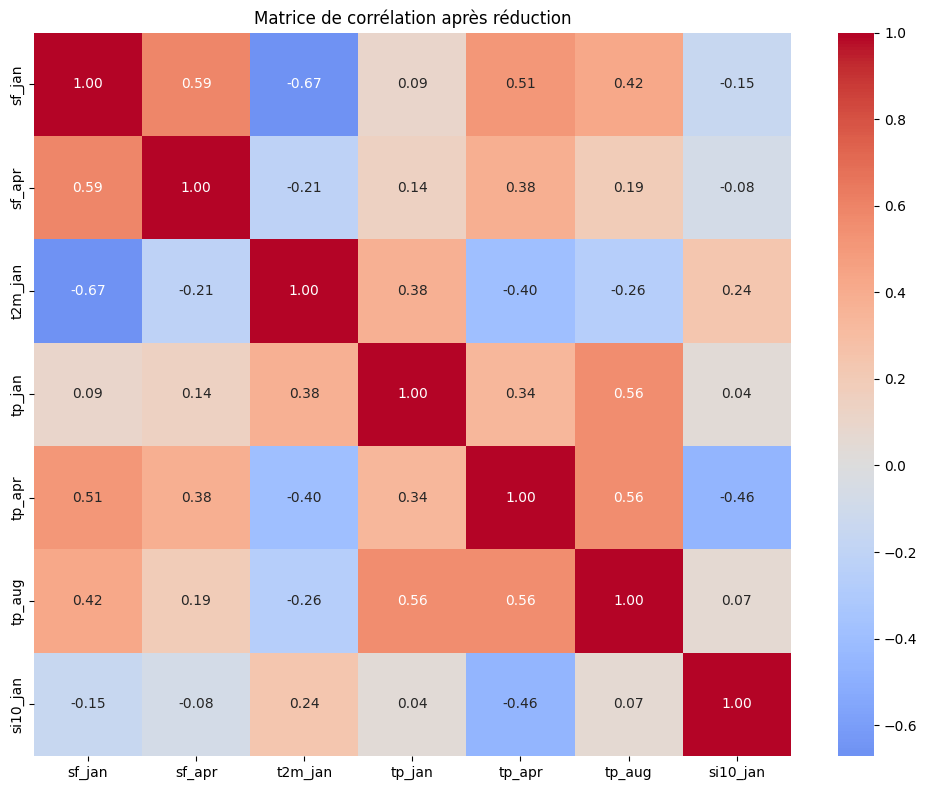

In [48]:
correlation_threshold = 0.8  # Ajustez selon vos besoins

# Calculer la matrice de corrélation (valeurs absolues pour inclure corrélations négatives)
corr_matrix = df.corr().abs()

# Créer une matrice triangulaire supérieure pour éviter les doublons
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Trouver les colonnes à supprimer (celles avec |corrélation| > seuil)
to_drop = [column for column in upper_triangle.columns 
           if any(upper_triangle[column] > correlation_threshold)]

print(f"Features à supprimer (|corrélation| > {correlation_threshold}):")
print(to_drop)

# Créer un nouveau dataset sans les features hautement corrélées
ds_70_reduced = ds_70.drop(columns=to_drop)
print(f"\nShape original: {ds_70.shape}")
print(f"Shape réduit: {ds_70_reduced.shape}")
print(f"Features conservées: {list(ds_70_reduced.columns)}")

# Visualiser la nouvelle matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(ds_70_reduced.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matrice de corrélation après réduction')
plt.tight_layout()

Features à supprimer (|corrélation| > 0.8):
['sf_feb', 'sf_mar', 'sf_may', 'sf_jun', 'sf_aug', 'sf_sep', 'sf_oct', 'sf_nov', 'sf_dec', 't2m_feb', 't2m_mar', 't2m_apr', 't2m_may', 't2m_jun', 't2m_jul', 't2m_aug', 't2m_sep', 't2m_oct', 't2m_nov', 't2m_dec', 'tp_feb', 'tp_mar', 'tp_may', 'tp_jun', 'tp_jul', 'tp_sep', 'tp_oct', 'tp_nov', 'tp_dec', 'si10_feb', 'si10_mar', 'si10_apr', 'si10_may', 'si10_jun', 'si10_jul', 'si10_aug', 'si10_sep', 'si10_oct', 'si10_nov', 'si10_dec']

Shape original: (58, 48)
Shape réduit: (58, 8)
Features conservées: ['sf_jan', 'sf_apr', 'sf_jul', 't2m_jan', 'tp_jan', 'tp_apr', 'tp_aug', 'si10_jan']


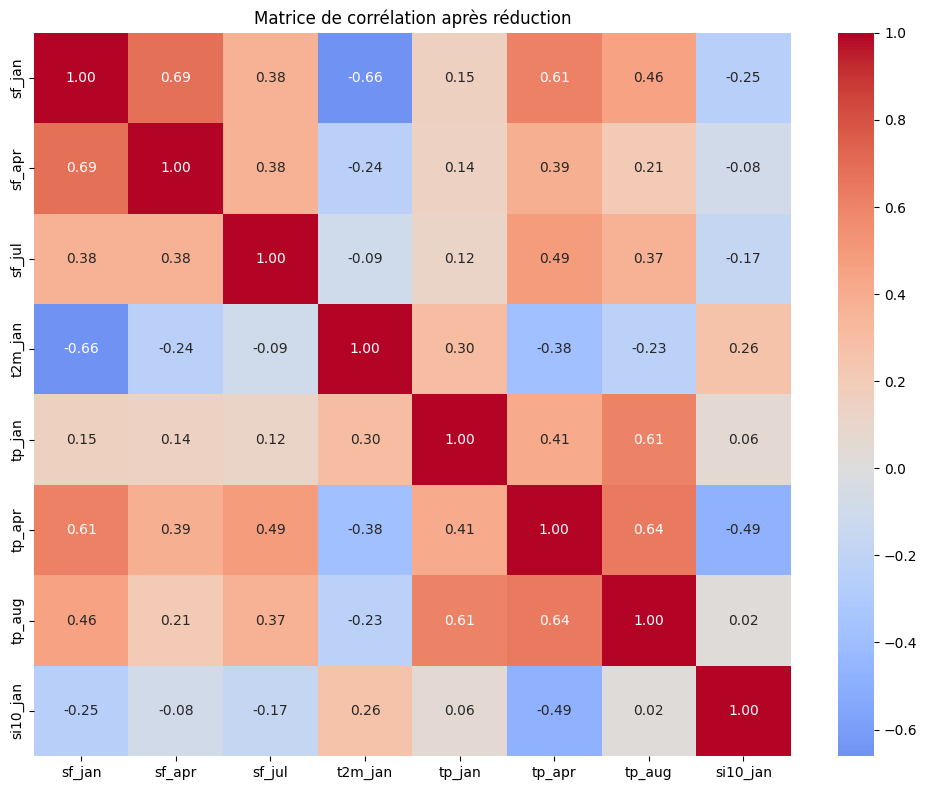

In [62]:
correlation_threshold = 0.8  # Ajustez selon vos besoins

# Calculer la matrice de corrélation (valeurs absolues pour inclure corrélations négatives)
corr_matrix = df.corr().abs()

# Créer une matrice triangulaire supérieure pour éviter les doublons
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Trouver les colonnes à supprimer (celles avec |corrélation| > seuil)
to_drop = [column for column in upper_triangle.columns 
           if any(upper_triangle[column] > correlation_threshold)]

print(f"Features à supprimer (|corrélation| > {correlation_threshold}):")
print(to_drop)

# Créer un nouveau dataset sans les features hautement corrélées
ds_2010_reduced = ds_2010.drop(columns=to_drop)
print(f"\nShape original: {ds_2010.shape}")
print(f"Shape réduit: {ds_2010_reduced.shape}")
print(f"Features conservées: {list(ds_2010_reduced.columns)}")

# Visualiser la nouvelle matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(ds_2010_reduced.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matrice de corrélation après réduction')
plt.tight_layout()

## PCA

In [18]:
import numpy as np
from matplotlib import pyplot as pl
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

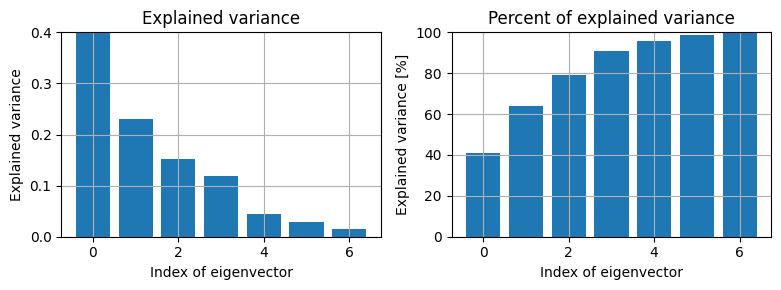

In [50]:

# matrice de correlation 
scaler = StandardScaler()
data_features_scaled = scaler.fit_transform(pd.DataFrame(ds_70_reduced))

# computing PCA
pca = PCA(n_components=data_features_scaled.shape[1])
pca.fit(data_features_scaled)

pl.figure(figsize=(8,3))
pl.subplot(1,2,1)
pl.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
pl.ylim(0.0, 0.4)
pl.title('Explained variance')
pl.xlabel('Index of eigenvector')
pl.ylabel('Explained variance')
pl.grid()
pl.subplot(1,2,2)
pl.bar(np.arange(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_))
pl.ylim(0.0, 100)
pl.title('Percent of explained variance')
pl.xlabel('Index of eigenvector')
pl.ylabel('Explained variance [%]')
pl.grid()
pl.tight_layout()

Loadings des composantes principales:


,sf_jan,sf_apr,t2m_jan,tp_jan,tp_apr,tp_aug,si10_jan
PC1,0.500358,0.366155,-0.371761,0.181574,0.493476,0.397696,-0.206678
PC2,-0.171179,-0.024506,0.494257,0.699089,0.086437,0.405883,0.254695
PC3,0.293182,0.284487,-0.160406,-0.130549,-0.342437,0.125147,0.810811



PC1 - Features les plus importantes:
sf_jan     0.500358
tp_apr     0.493476
tp_aug     0.397696
t2m_jan    0.371761
sf_apr     0.366155
Name: PC1, dtype: float64

PC2 - Features les plus importantes:
tp_jan      0.699089
t2m_jan     0.494257
tp_aug      0.405883
si10_jan    0.254695
sf_jan      0.171179
Name: PC2, dtype: float64

PC3 - Features les plus importantes:
si10_jan    0.810811
tp_apr      0.342437
sf_jan      0.293182
sf_apr      0.284487
t2m_jan     0.160406
Name: PC3, dtype: float64


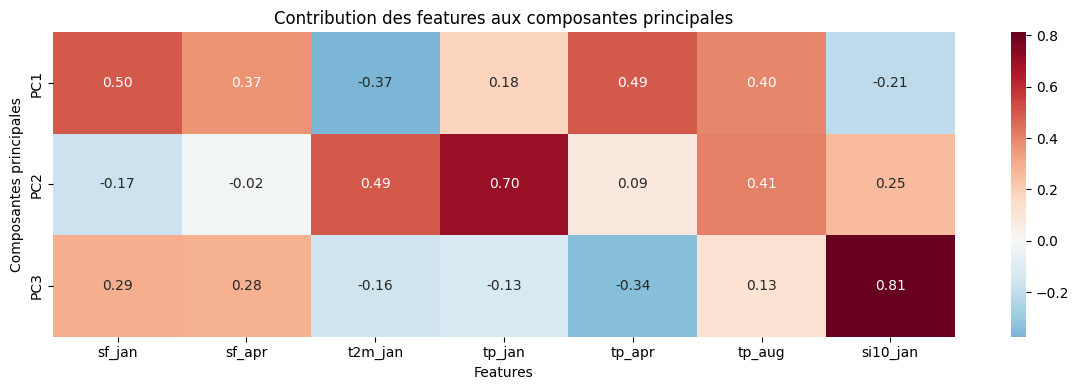

In [38]:
# Afficher les composantes principales et leur relation avec les features originales
n_components_to_show = 3  # Nombre de composantes à analyser

# Créer un DataFrame avec les loadings (poids) de chaque feature pour chaque composante
loadings = pd.DataFrame(
    pca.components_[:n_components_to_show],
    columns=ds_70_reduced.columns,
    index=[f'PC{i+1}' for i in range(n_components_to_show)]
)

print("Loadings des composantes principales:")
display(loadings)

# Visualiser les loadings avec un heatmap
pl.figure(figsize=(12, 4))
sns.heatmap(loadings, cmap='RdBu_r', center=0, annot=True, fmt='.2f')
pl.title('Contribution des features aux composantes principales')
pl.xlabel('Features')
pl.ylabel('Composantes principales')
pl.tight_layout()

# Afficher les features les plus importantes pour chaque composante
for i in range(n_components_to_show):
    print(f"\nPC{i+1} - Features les plus importantes:")
    # Trier par valeur absolue pour voir l'importance
    pc_sorted = loadings.iloc[i].abs().sort_values(ascending=False)
    print(pc_sorted.head(5))

In [ ]:
# Afficher les composantes principales et leur relation avec les features originales
n_components_to_show = 3  # Nombre de composantes à analyser

# Créer un DataFrame avec les loadings (poids) de chaque feature pour chaque composante
loadings = pd.DataFrame(
    pca.components_[:n_components_to_show],
    columns=ds_70_reduced.columns,
    index=[f'PC{i+1}' for i in range(n_components_to_show)]
)

print("Loadings des composantes principales:")
display(loadings)

# Visualiser les loadings avec un heatmap
pl.figure(figsize=(12, 4))
sns.heatmap(loadings, cmap='RdBu_r', center=0, annot=True, fmt='.2f')
pl.title('Contribution des features aux composantes principales')
pl.xlabel('Features')
pl.ylabel('Composantes principales')
pl.tight_layout()

# Afficher les features les plus importantes pour chaque composante
for i in range(n_components_to_show):
    print(f"\nPC{i+1} - Features les plus importantes:")
    # Trier par valeur absolue pour voir l'importance
    pc_sorted = loadings.iloc[i].abs().sort_values(ascending=False)
    print(pc_sorted.head(5))

In [51]:
target_explained_variance = 0.9
cummulated_variance = np.cumsum(pca.explained_variance_ratio_)
min_index = np.sum(cummulated_variance < target_explained_variance)

print('The projection will try to keep', target_explained_variance*100, '% of the variance')
print(min_index + 1, 'eigenvectors are needed')
print('Keeping', cummulated_variance[min_index]*100, '% of the variance')

projected = PCA(n_components = min_index+1).fit_transform(data_features_scaled)

The projection will try to keep 90.0 % of the variance
4 eigenvectors are needed
Keeping 91.06685960316491 % of the variance


In [ ]:
target_explained_variance = 0.9
cummulated_variance = np.cumsum(pca.explained_variance_ratio_)
min_index = np.sum(cummulated_variance < target_explained_variance)

print('The projection will try to keep', target_explained_variance*100, '% of the variance')
print(min_index + 1, 'eigenvectors are needed')
print('Keeping', cummulated_variance[min_index]*100, '% of the variance')

projected = PCA(n_components = min_index+1).fit_transform(data_features_scaled)

In [55]:
ds_70_complete = loaded_datasets['1970-1979']
cities = ds_70_complete[['latitude', 'longitude']]
ds_final = pd.concat([cities.reset_index(drop=True), pd.DataFrame(projected)], axis=1)
pd.DataFrame(ds_final)

,latitude,longitude,0,1,2,3
0,35.25,33.25,-2.685183,-0.341353,-0.930916,1.458443
1,35.25,33.25,-2.685183,-0.341353,-0.930916,1.458443
2,36.00,14.50,-3.278969,0.963117,0.963407,1.069825
3,36.25,-5.25,-2.627178,0.944883,-0.056300,1.227654
4,38.00,23.75,-2.456299,-0.168336,-0.669463,1.215616
5,38.75,-9.25,-2.367091,1.055498,-0.250032,1.205859
6,40.00,32.75,-0.876428,-1.357171,-0.817865,0.477285
7,40.25,44.50,-0.412156,-2.481185,-0.449874,0.210930
8,40.50,-3.75,-1.621672,-0.493699,-0.994154,0.702704
9,40.50,45.00,3.453099,-1.259579,-0.627531,0.343012


## Distance

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [58]:
def find_closest_city(distance_function, source_ds, target_ds, target_city):
    target_city_coords = target_ds[(target_ds['latitude'] == target_city[0]) & (target_ds['longitude'] == target_city[1])]
    if target_city_coords.empty:
        raise ValueError("Target city not found in the target dataset.")
    target_features = target_city_coords.iloc[0, 2:].values  # Exclude latitude and longitude

    min_distance = float('inf')
    closest_city = None

    for index, row in source_ds.iterrows():
        source_city_coords = row[['latitude', 'longitude']].values
        source_features = row.iloc[2:].values  # Exclude latitude and longitude

        distance = distance_function([source_features], [target_features])

        if distance < min_distance:
            min_distance = distance
            closest_city = source_city_coords

    return closest_city
    

In [ ]:
find_closest_city(euclidean_distances, ds_final, ds_final, (38.75, -9.25)) 

array([38.75, -9.25])